In [1]:
import time
print(time.ctime())

Sat Dec  8 12:38:01 2018


Es hat sich gezeigt, dass das Thema "Simulation dynamischer Systeme" durch das bisherige Material in Kurs2b nicht ausreichend abgedeckt wird, was in den folgenden Kursen teilweise Verständnisschwierigkeiten verursacht. Dieses Notebook versucht die wesentlichen Informationen ausführlicher zusammenzufassen und geht auf folgende Punkte ein:

- Was ist eine dynamisches System?
- Wie kann man ein dynamisches System durch eine Differentialgleichung beschreiben?
- Was ist eine Zustandsraumdarstellung? 
- Wie kann man Differentialgleichungen numerisch lösen?
- Wie kann man mit Python ein dynamisches System simulieren?

Das Dokument versucht einen angemessenen Kompromiss zwischen Allgemeingültigkeit und Verständlichkeit herzustellen, im Zweifelsfall zugunsten der Verständlichkeit. 

### Was ist ein dynamisches System?

Ein System, dessen "Zustand" sich im Laufe der Zeit ändern kann.
Beispiele:

- Badewanne mit Zulauf und Ablauf (Zustandsgröße: Füllstand)
- Tasse mit Tee (Zustandsgrößen: Temperatur des Inhalts, Temperatur der Tasse)
- Pendel (Zustandsgrößen: Auslenkungswinkel und Winkelgeschwindigkeit)

### Wie kann man ein dynamisches System durch eine Differentialgleichung beschreiben?

Wenn sich eine Größe über die Zeit verändern kann ist es sinnvoll, sie mathematisch als Funktion der Zeit zu modellieren.
Im Badewannen-Beispiel: $h(t)$.

Die Geschwindigkeit bzw. die Rate der zeitlichen Veränderung einer Größe wird über die erste Ableitung beschrieben. Im Beispiel: $\dot h(t)$. Auch das ist selbst wieder eine Zeitfunktion.
Im Prozess der *Modellbildung* werden z.B. durch Anwendung von Bilanzen und physikalischer Gesetzmäßigkeiten Gleichungen hergeleitet, welche die Ableitungen der Systemgößen mit den Systemgrößen selber in Zusammenhang stellen. Im Badewannen-Beispiel gilt
$$\dot h(t) = \frac{1}{A}(q_\mathrm{zu}(t) - q_\mathrm{ab}(t)), \tag{1}$$
d. h. die Veränderungsrate der Wasserspiegelhöhe ist proportional zur Differenz von Zulauf und Ablauf. Der Einfachheit halber wird eine über die Höhe konstante Querschnittsfläche $A$ angenommen.


Die Bilanzgleichung (1) kann man zwar als Differentialgleichung (DGL) auffassen, weil eine Ableitung ($\dot h$) auftritt, aber eine "typische" DGL erhält man erst, wenn man für $q_\mathrm{ab}(t)$ noch die pyhsikalische Beziehung
$$q_\mathrm{ab}(t) = c \sqrt{h(t)}$$
(mit $c$ abhängig vom Querschnitt der Abflussöffnung und der Erdbeschleunigung $g$) einsetzt. Wenn man dann den Zufluss noch als konstant annimmt, d.h. $q_\mathrm{zu}(t)\equiv q_0$ setzt, erhält man
$$\dot h(t) = \frac{1}{A}\Big(q_0 -  c \sqrt{h(t)}\Big). \tag{2}$$
Diese DGL besagt, dass die Änderungsgeschwindigkeit des Füllstandes vom Füllstand selbst abhängt. So wie die Lösung einer (skalaren) algebraischen Gleichung eine Zahl ist, ist die *Lösung einer DGL* eine Funktion, in unserem Fall $h(t)$, die Höhe in Abhängigkeit von der Zeit.

---

Ein anderes Beispiel ist ein (mathematisches) Pendel mit der Auslenkung $\varphi$.
Aus einer Drehmomentenbilanz um die Achse erhält man (Modellbildung)
$$ml^2 \ddot \varphi = - m g l\sin \varphi. \tag{3}$$
Dabei handelt es sich um eine skalare DGL 2. Ordnung (weil die höchste auftretende Ableiung 2. Ordnung ist).

Bei der Betrachtung von DGLn kann man oft [mathematisch](https://de.wikipedia.org/wiki/Satz_von_Picard-Lindel%C3%B6f)  die Existenz und Eindeutigkeit der Lösung zeigen - die analytische *Berechnung* der Lösung ist aber nur in Spezialfällen möglich, z.B. bei linearen DGLn. Deswegen wird muss man sich meist mit einer numerischen Näherungslösung zufrieden geben. Wenn die DGL ein dynamisches System beschreibt, spricht man dann auch von einer *Simulation des Systems*.



### Was ist eine Zustandsraumdarstellung?

Um nicht für jede DGL ein eigenes numerisches Lösungsverfahren herleiten zu müssen, ist es sinnvoll, von einer Darstellung auszugehen, die möglichst viele relevante Fälle abdeckt. Die Zustandsraumdarstellung
$$\dot {\mathbf{x}}(t) = \mathbf{f}(\mathbf{x}(t))\qquad
\text{mit dem Zustandsvektor} ~ \mathbf{x}(t) =
\left(\begin{matrix}
x_1(t) \\
\vdots \\
x_n(t)
\end{matrix} \right)
\in \mathbb{R}^n \tag{4} $$ 
ist deswegen sehr nützlich und verbreitet.

Es handelt sich um ein *System von $n$ verkoppelten DGLn erster Ordnung.*
Offensichtlich ist Gleichung (2) bereits in Zustandsraumdarstellung. Es gilt $n=1$ und $\mathbf{x} = h$.

Die skalare DGL zweiter Ordnung (3) kann durch mit Hilfe einer sogenannten definitorischen Gleichung in ein System von zwei DGLn erster Ordnung überführt werden:
\begin{align}
x_1:= \varphi \\
x_2:= \dot \varphi
\end{align}
Daraus ergibt sich durch Auflösen von (3) nach $\ddot \varphi = \dot x_2$ die Zustandsraumdarstellung des Pendels:
\begin{align}
\dot{\mathbf{x}}(t) =
\left(\begin{matrix}
 \dot x_1(t) \\
\dot x_2(t)
\end{matrix} \right) = 
\left(\begin{matrix}
x_2(t) \\
-\frac{g}{l} \sin x_1
\end{matrix} \right).
\tag{5}
\end{align}


### Wie kann man  ein  DGL-System numerisch lösen?

Bei der numerischen Lösung eines Zustandsraummodells (5) geht man typischerweise davon aus, dass der Anfangszustand $\mathbf{x}(0)=:\mathbf{x}_0$ bekannt und der Verlauf von $\mathbf{x}(\cdot)$ auf dem Zeitintervall $[0, T]$ gesucht ist. Deswegen spricht man bezüglich der Berechnung der Lösung auch von einem  *Anfangswertproblem* (initial value problem, IVP).
Weil man aus der Zeitableitung von $\mathbf{x}(t)$ die Größen $\mathbf{x}(t)$ berechnet, spricht man auch von *numerischer Integration* einer DGL.
Das einfachste numerische Integrations- bzw. Lösungsverfahren ist das *explizite Euler-Verfahren*. Dabei wird die Änderungsrate des Zustandes $\mathbf{f}(\mathbf{x})$ während des kurzen Zeitabschnittes $\Delta t$ als konstant angenommen.
Man erhält im ersten Schritt
$$\mathbf{x}(\Delta t) \approx \mathbf{x}_0 +  \Delta t \cdot \mathbf{f}(\mathbf{x}_0),$$
d.h. die Änderung des Zustandes (d.h. $\mathbf{x}(\Delta t) - \mathbf{x}_0$ ) ist gleich $\Delta t$ mal (konstanter) Änderungsrate. Dieses Verfahren kann man iterativ fortsetzen:
$$\mathbf{x}\big(\Delta t \cdot (k+1)\big) \approx \mathbf{x}(\Delta t \cdot k) +  \Delta t \cdot \mathbf{f}\big(\mathbf{x}(\Delta t \cdot k)\big)$$
bzw. in Kurzschreibweise
$$\mathbf{x}_{k+1} = \mathbf{x}_{k} +  \Delta t \cdot \mathbf{f}(\mathbf{x}_k).$$
Dadurch erhält man zwar nicht den kompletten Lösungsverlauf $t \mapsto \mathbf{x}(t)$, sondern nur punktweise die approximierten Funktionswerte des Zustandsvektors $\mathbf{x_1} := \mathbf{x}(\Delta t), \mathbf{x_2} := \mathbf{x}(2 \Delta t), \ldots, \mathbf{x_N} := \mathbf{x}(N \Delta t)$ mit $N \Delta t =T$, aber man kann zeigen, dass für hinreichend kleine Werte von $\Delta t$ diese Näherungslösung gegen die exakte Lösung - von der man weiß, dass es sie gibt, die man aber i.A. nicht als Formel aufschreiben kann - konvergiert.

Dieses Verfahren ist zwar einfach zu erklären, hat aber nur für kleine Schrittweiten $\Delta t$ eine akzeptable Appoximationsgenauigkeit. In der Praxis werden oft kompliziertere Verfahren wie z.B. *Runge-Kutta*-Verfahren mit einer Schrittweitensteuerung verwendet.
Aus Anwendungs-Sicht spielt das aber keine große Rolle. Für die meisten Anwendungsfälle kann man auf bereits vorgefertigte numerische Integrationsverfahren zurückgreifen.


### Wie kann man mit Python ein dynamisches System simulieren?

Im Pythonkurs verwenden wir den DGL-Löser (engl.: ODE solver; "ode" steht für ordinary differential equations) `odeint` aus dem Paket `scipy.integrate`.

In [2]:
from scipy.integrate import odeint
print(odeint.__doc__[:460]) # Anfang des doc-Strings ausgeben


    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.

    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.

    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::

        dy/dt = func(y, t, ...)  [or func(t, y, ...)]

    where y can be a vector.




Die Funktion `odeint(rhs, xx0, tt)` erwartet drei Parameter:
1. Eine Funktion der rechten Seite der DGL also $\mathbf{f}(\mathbf{x}, t)$,
2. den Anfangszustand $x_0$, 
3. einen array mit Zeitpunkten bei denen die Lösung ausgewertet werden soll.

**Hinweise**

1. Die Funktion $\mathbf{f}$ wird im Python-Code of `rhs(x, t)` genannt, weil sie die "right hand side" der DGL beschreibt. In Gleichung (4) hängt die Funktion $\mathbf{f}$ nur von $\mathbf{x}$ und nicht von $t$ ab. Die Funktion `odeint` erwartet erwartet aber als erstes Argument immer eine Python-Funktion, die zwei Parameter akzeptiert. Dadurch können auch zeitvariante DGL simuliert werden (modifiziertes Badewannen-Beispiel: Zulauf ist eine explizite Funktion der Zeit). Soll eine DGL-simuliert werden, die wie das Pendelbeispiel nicht explizit von der Zeit abhängt, kann das 2. Argument innerhalb von `rhs` ignoriert werden.
2. Wie die Argumente heißen ist natürlich egal. In diesem Text wird der Zustandsvektor mit $\mathbf{x}$ bzw. mit `xx` bezeichnet im Docstring von  `odeint` heißt er `y`.
3. Der Array `tt` legt die Länge des Rückgabe-Arrays `res` von `odeint` fest: Für jedes Element $t_i$ in `tt` hat der Array `res` eine Zeile, welche den Werten ($x_1(t_i), \ldots, x_n(t_i)$) entspricht.

#### Beispiel

Im Folgenden wird das Pendel aus Gleichung (5) für 25 Sekunden für verschiedene Anfangszustände ($\varphi(0)= 20^\circ$ sowie $\varphi(0)= 170^\circ$ ohne und mit zusätzlicher Winkelgeschwindigkeit) simuliert.

In [3]:
from numpy import sqrt, sin, array, linspace, pi
import matplotlib.pyplot as plt

g = 9.81
l = 1

# Definition of the right hand side

def rhs_pendulum(xx, t):
    """
    Right hand side of pendulum ode.
    
    :param xx:  state vector (1d-array or list or tuple)
    :param t:   time instant (ignored here)
    """
    x1, x2 = xx
    
    x1dot = x2
    x2dot = -sqrt(g/l)*sin(x1)
    
    return array([x1dot, x2dot])

In [4]:
xx0_20 = [20*pi/180, 0]
xx0_170a = [170*pi/180, 0]
xx0_170b = [170*pi/180, 0.31]
tt = linspace(0, 25, 1000)

In [5]:
res_20 = odeint(rhs_pendulum, xx0_20, tt)
res_170a = odeint(rhs_pendulum, xx0_170a, tt)
res_170b = odeint(rhs_pendulum, xx0_170b, tt)

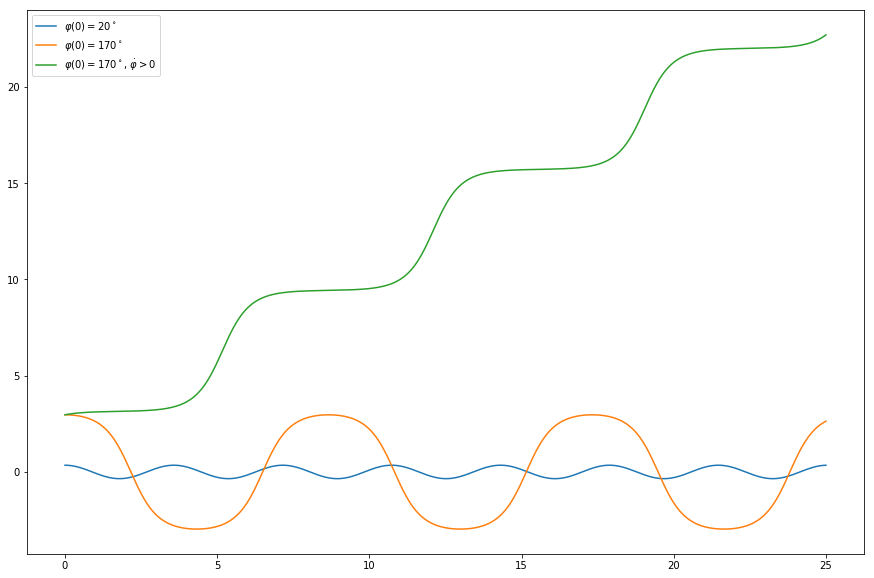

In [6]:
plt.figure(figsize=(15, 10))
plt.plot(tt, res_20[:, 0], label=r"$\varphi(0)= 20^\circ$")
plt.plot(tt, res_170a[:, 0], label=r"$\varphi(0)= 170^\circ$")
plt.plot(tt, res_170b[:, 0], label=r"$\varphi(0)= 170^\circ$, $\dot \varphi > 0$")

plt.legend()

Auswertung der drei Fälle:

Bei $20°$ Aunfangsauslenkung schwingt das Pendel annähernd harmonisch (d.h. $\varphi(t) \approx \varphi(0) \cdot \cos\Big(\sqrt{\frac{g}{l}} \cdot t\Big)$). Diese Lösung könnte man auch analytisch über eine Linearisierung von (3) bzw. (5) berechnen, denn für kleine Auslenkungen gilt $\sin \varphi \approx \varphi$.

Bei $170°$ Anfangsauslenkung schwingt das Pendel deutlich nicht-harmonisch (orangene Kurve sieht anders aus als sin- bzw. cos-Funktion). Außerdem hat sich die Periodendauer signifikant erhöht. (Bei $180°$ Anfangsauslenkung wäre sie unendlich lang, weil laut mathematischem Modell das Pendel in der oberen Ruhelage verharren würde.)

Kommt zu den $170°$ Anfangsauslenkung noch eine passende Anfangs-Winkelgeschwindigkeit, dann schwingt das Pendel nicht mehr sondern vollzieht Überschläge (grüne Kurve).

Schlussbemerkung: Auch für die nichtlineare Pendel-DGL (3) exisitiert eine exakte analytische Lösung, siehe z.B. [Wikipedia](https://de.wikipedia.org/wiki/Mathematisches_Pendel#Exakte_L%C3%B6sung). Trotzdem bleibt die Aussage, dass man typischerweise und insbesondere für praktisch relevante Systeme keine analytische Lösung finden kann, gültig. Deswegen ist die numerische Integration von DGLn-Systemen eine zentrale Technik in den Natur- und Ingenieurwissenschaften.



In [7]:
import ipydex
ipydex.save_current_nb_as_html(0)